In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import numpy as np
from shapely.geometry import Point

In [253]:
data = pd.read_csv('assests/weather.csv')

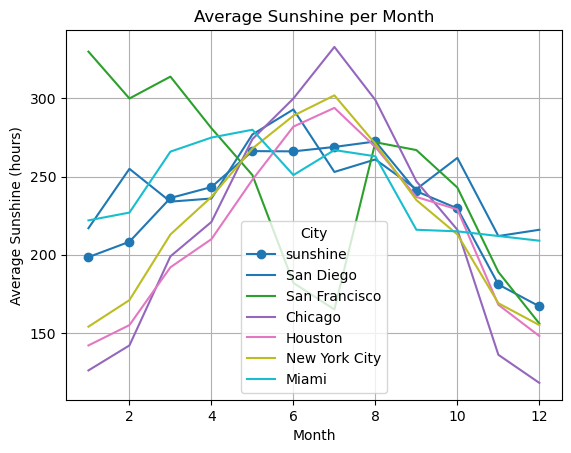

In [254]:
average_sunshine = data.groupby('monthnum')['sunshine'].mean()
average_sunshine.plot(kind='line', marker='o', title='Average Sunshine per Month')
plt.xlabel('Month')
plt.ylabel('Average Sunshine (hours)')
plt.grid(True)


cities = data['city'].unique()
colors = plt.cm.get_cmap('tab10', len(cities))

for i, city in enumerate(cities):
    city_data = data[data['city'] == city]
    city_avg_sunshine = city_data.groupby('monthnum')['sunshine'].mean()
    plt.plot(city_avg_sunshine.index, city_avg_sunshine.values, label=city, color=colors(i))

plt.legend(title='City')
plt.show()

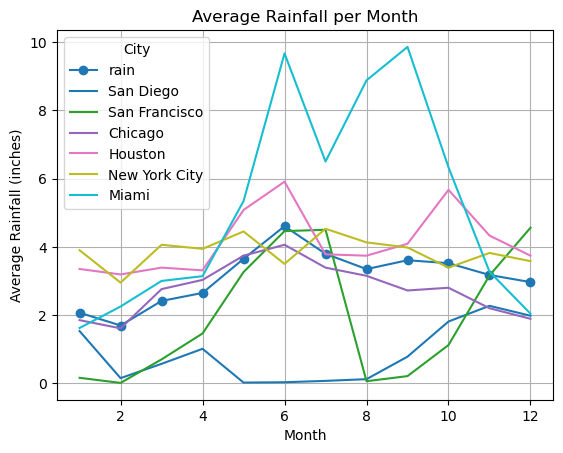

In [255]:
average_rainfall = data.groupby('monthnum')['rain'].mean()
average_rainfall.plot(kind='line', marker='o', title='Average Rainfall per Month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (inches)')
plt.grid(True)

for i, city in enumerate(cities):
    city_data = data[data['city'] == city]
    city_avg_rainfall = city_data.groupby('monthnum')['rain'].mean()
    plt.plot(city_avg_rainfall.index, city_avg_rainfall.values, label=city, color=colors(i))

plt.legend(title='City')
plt.show()


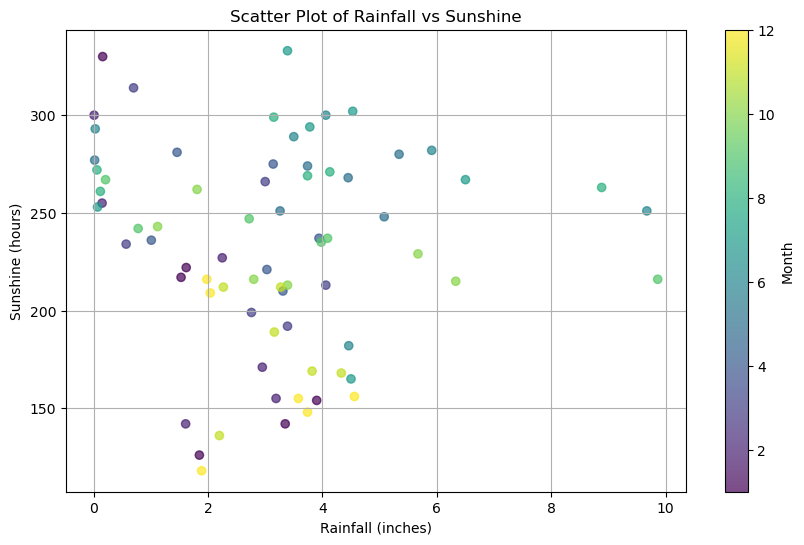

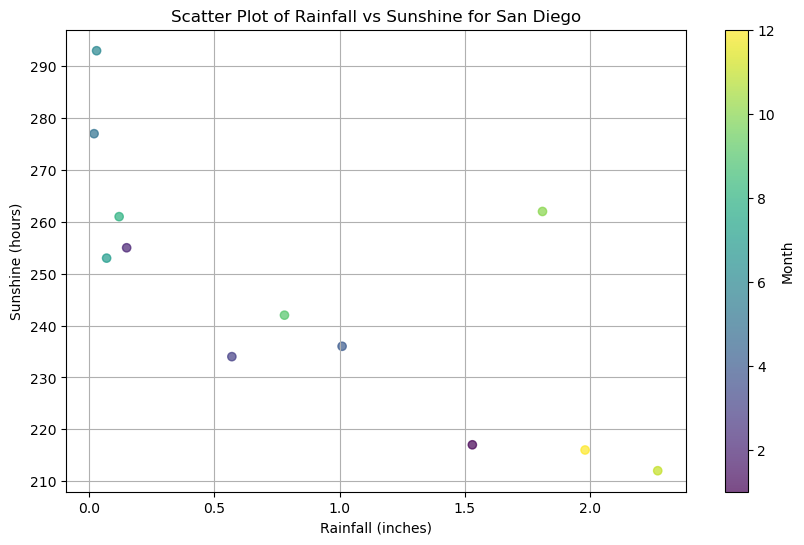

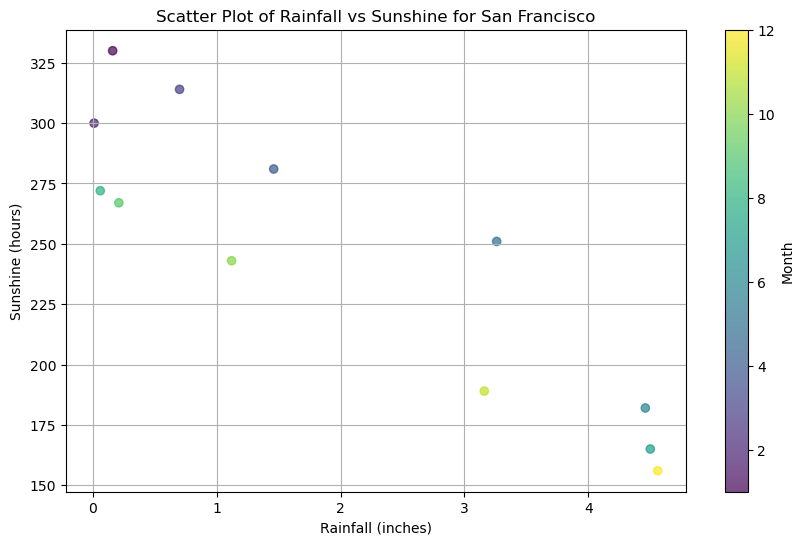

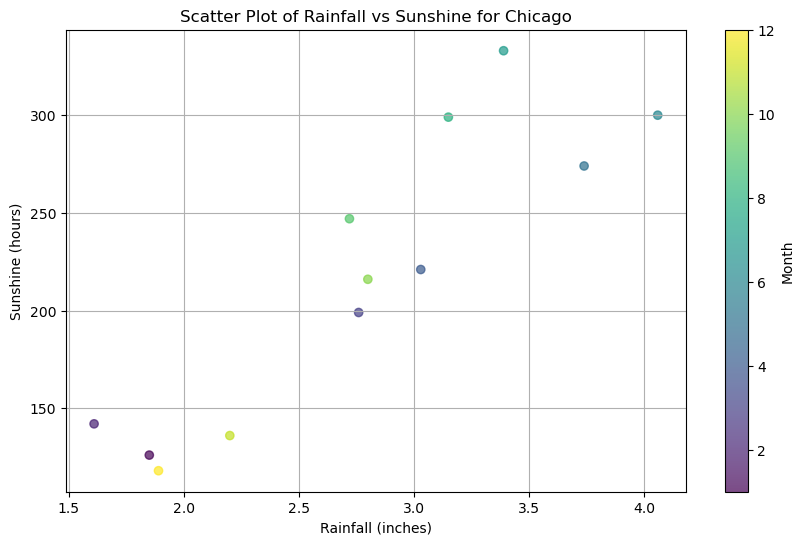

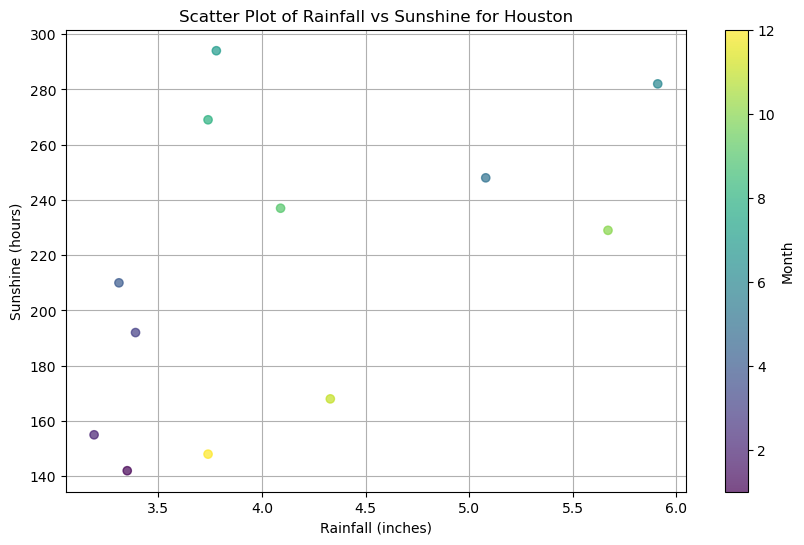

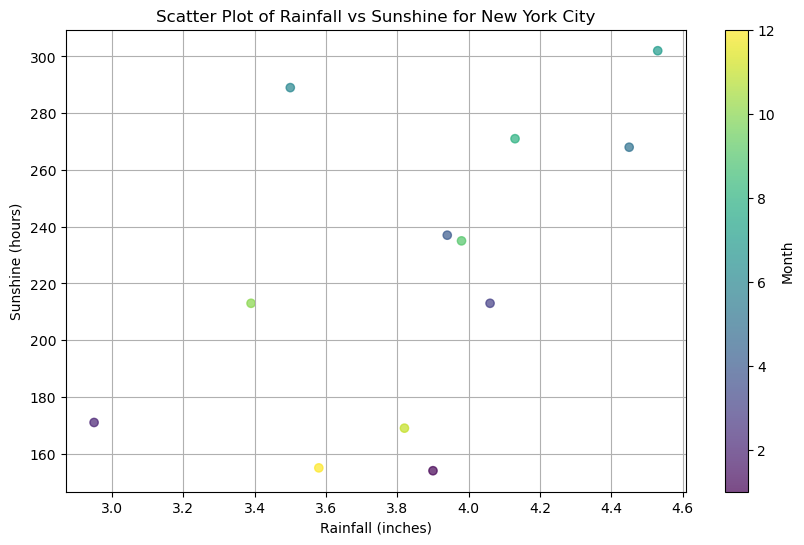

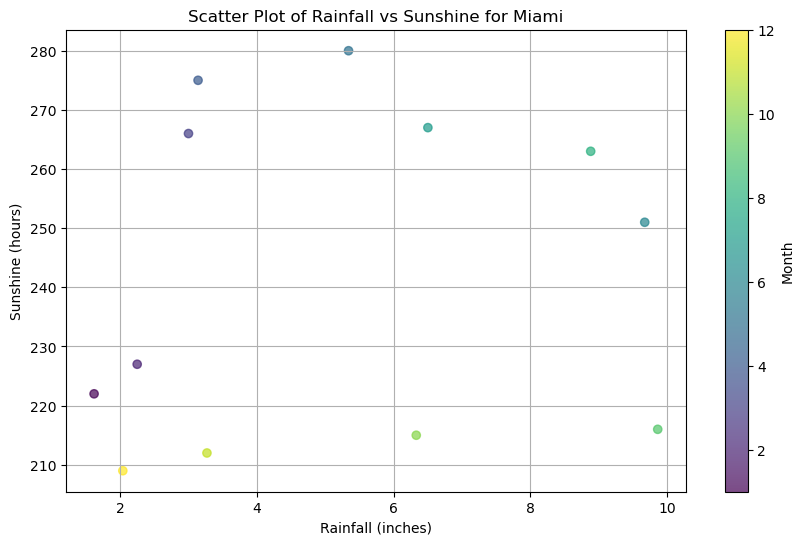

In [256]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['rain'], data['sunshine'], c=data['monthnum'], cmap='viridis', alpha=0.7, norm=plt.Normalize(vmin=1, vmax=12))
plt.colorbar(scatter, label='Month')
plt.title('Scatter Plot of Rainfall vs Sunshine')
plt.xlabel('Rainfall (inches)')
plt.ylabel('Sunshine (hours)')
plt.grid(True)
plt.show()

city_colors = {city: colors(i) for i, city in enumerate(cities)}

for city in cities:
    city_data = data[data['city'] == city]
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(city_data['rain'], city_data['sunshine'], c=city_data['monthnum'], cmap='viridis', alpha=0.7, norm=plt.Normalize(vmin=1, vmax=12))
    plt.colorbar(scatter, label='Month')
    plt.title(f'Scatter Plot of Rainfall vs Sunshine for {city}')
    plt.xlabel('Rainfall (inches)')
    plt.ylabel('Sunshine (hours)')
    plt.grid(True)
    plt.show()


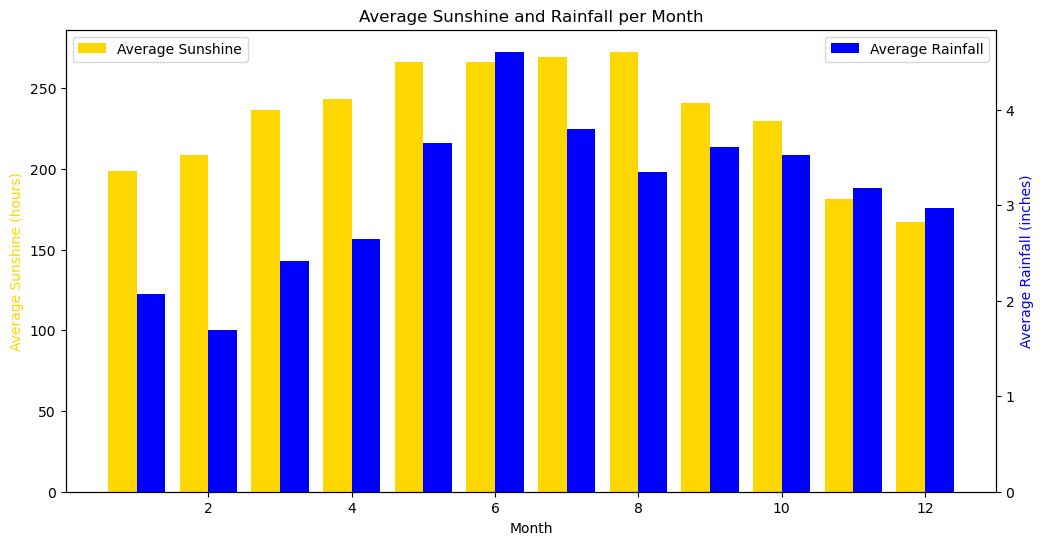

In [257]:
# Create a new DataFrame for combined data
combined_data = pd.DataFrame({
    'Month': average_sunshine.index,
    'Average Sunshine': average_sunshine.values,
    'Average Rainfall': average_rainfall.values
})

# Plotting the combined bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting sunshine
ax1.bar(combined_data['Month'] - 0.2, combined_data['Average Sunshine'], width=0.4, label='Average Sunshine', color='gold')

# Creating a second y-axis for rainfall
ax2 = ax1.twinx()
ax2.bar(combined_data['Month'] + 0.2, combined_data['Average Rainfall'], width=0.4, label='Average Rainfall', color='blue')

# Setting labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sunshine (hours)', color='gold')
ax2.set_ylabel('Average Rainfall (inches)', color='blue')
plt.title('Average Sunshine and Rainfall per Month')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

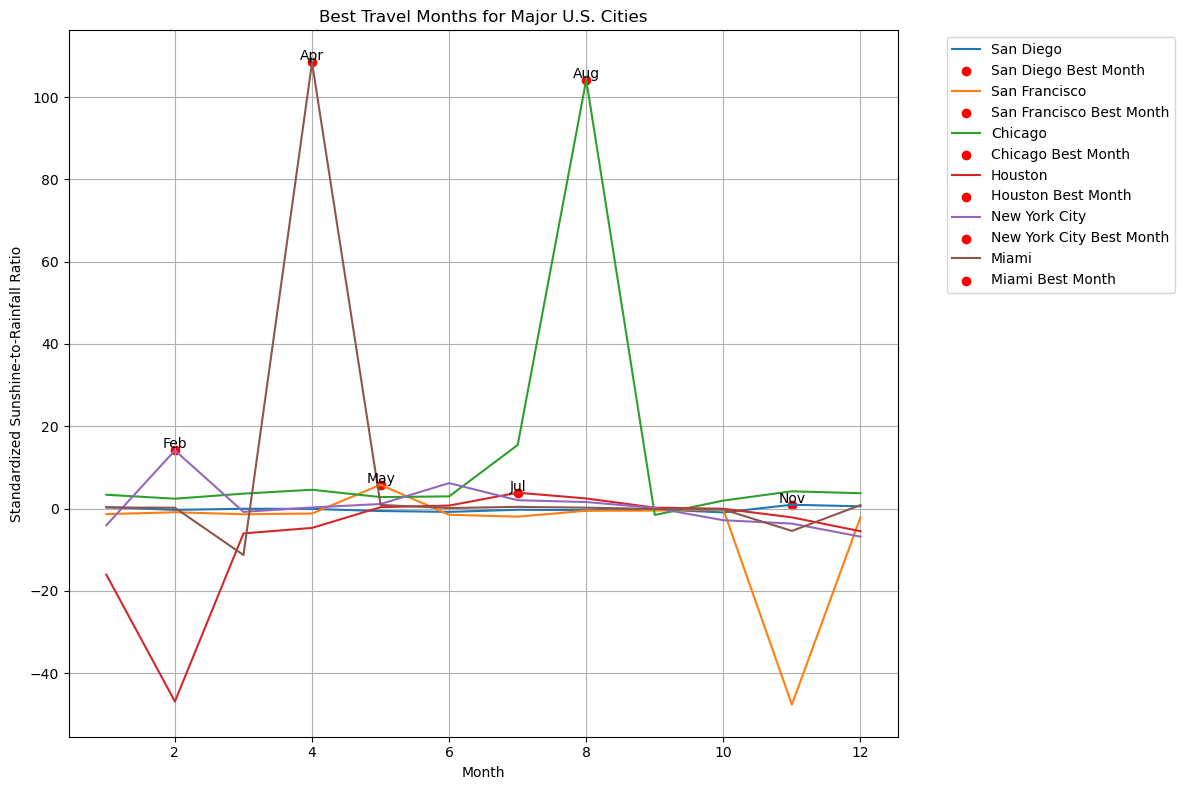

In [258]:
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the rain and sunshine columns
scaler = StandardScaler()
df[['rain', 'sunshine']] = scaler.fit_transform(df[['rain', 'sunshine']])

# Step 2: Calculate the ratio
df['ratio'] = df['sunshine'] / df['rain'].replace(0, 0.1)  # Avoid division by zero

# Step 3: Identify the best month for each city
best_months = df.loc[df.groupby('city')['ratio'].idxmax()]
df['is_best_month'] = df.index.isin(best_months.index)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))

cities = df['city'].unique()
for city in cities:
    city_data = df[df['city'] == city]
    plt.plot(city_data['monthnum'], city_data['ratio'], label=city)
    
    # Highlight the best month
    best_month = city_data[city_data['is_best_month']]
    plt.scatter(best_month['monthnum'], best_month['ratio'], color='red', label=f'{city} Best Month')
    plt.text(best_month['monthnum'], best_month['ratio'] + 0.5, best_month['month'].values[0], ha='center')

# Step 5: Customize the chart
plt.title("Best Travel Months for Major U.S. Cities")
plt.xlabel("Month")
plt.ylabel("Standardized Sunshine-to-Rainfall Ratio")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

In [259]:
season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}

data = pd.read_csv('assests/weather.csv')





data['season'] = data['monthnum'].apply(lambda x : season[x])

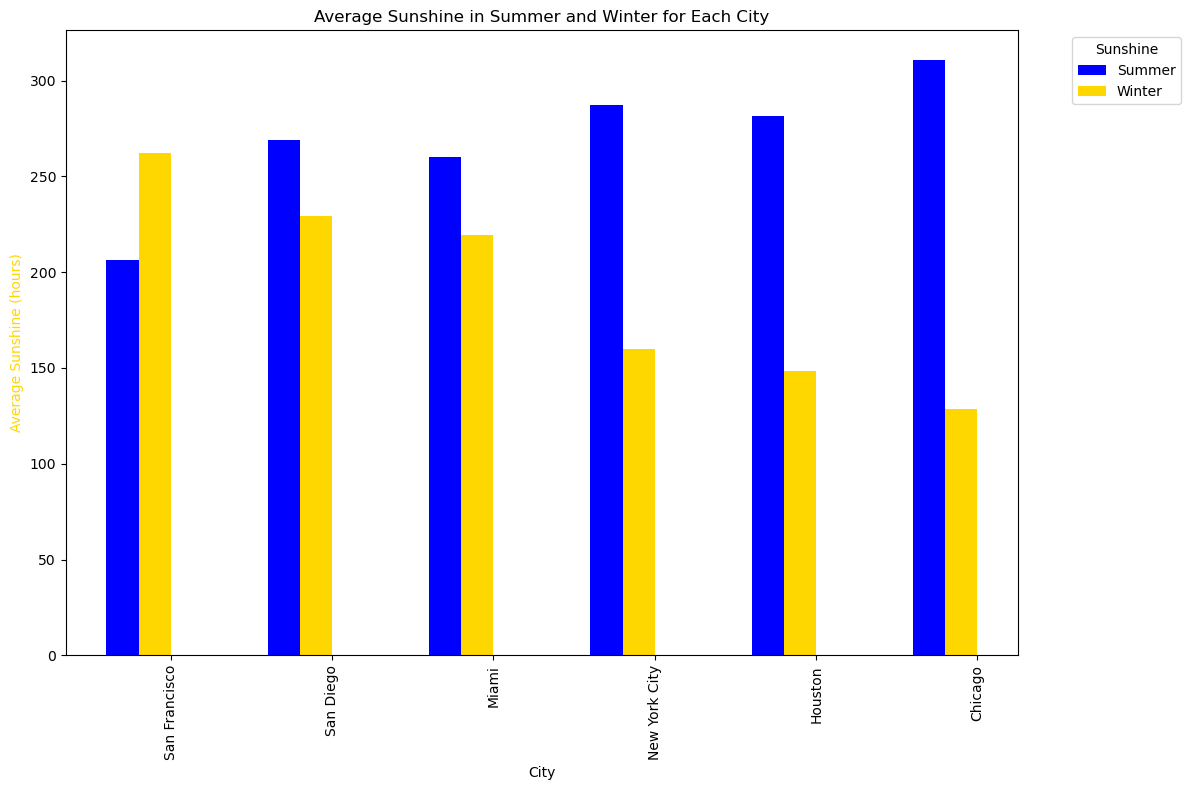

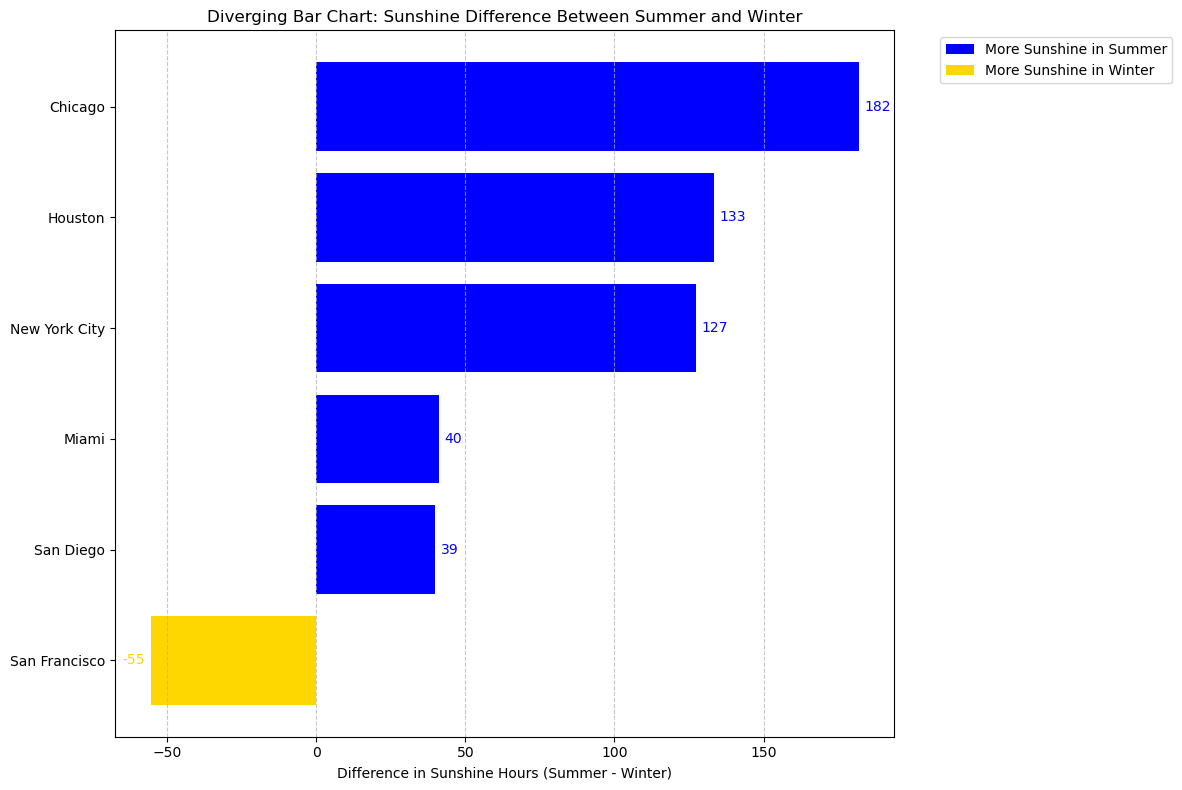

In [260]:
# Filter the pivot table to include only Summer and Winter seasons
pivot_data = data.pivot_table(index='city', columns='season', values='sunshine', aggfunc='mean')

pivot_data_filtered = pivot_data[['Summer', 'Winter']]

# Sort the data by Winter sunshine
pivot_data_filtered = pivot_data_filtered.sort_values(by=('Winter'), ascending=False)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting average sunshine for Summer and Winter
pivot_data_filtered.plot(kind='bar', ax=ax1, position=1, width=0.4, color=['blue', 'gold'], legend=True)

# Setting labels and title
ax1.set_xlabel('City')
ax1.set_ylabel('Average Sunshine (hours)', color='gold')
plt.title('Average Sunshine in Summer and Winter for Each City')

# Adding legends
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Sunshine')

# Display the plot
plt.tight_layout()
plt.show()
# Create a diverging bar chart with bars facing two sides
fig, ax = plt.subplots(figsize=(12, 8))

# Separate the data into positive and negative differences for visualizing both directions
pivot_data_filtered['Difference'] = pivot_data_filtered['Summer'] - pivot_data_filtered['Winter']

# Plot the positive and negative differences as diverging bars
bars_positive = ax.barh(pivot_data_filtered.index, pivot_data_filtered['Difference'].apply(lambda x: x if x > 0 else 0), 
                        color='blue', label='More Sunshine in Summer')
bars_negative = ax.barh(pivot_data_filtered.index, pivot_data_filtered['Difference'].apply(lambda x: x if x < 0 else 0), 
                        color='gold', label='More Sunshine in Winter')

# Add value labels for positive bars
for bar in bars_positive:
    if bar.get_width() > 0:  # Ensure the bar is positive
        ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_width())}', ha='left', va='center', fontsize=10, color='blue')

# Add value labels for negative bars
for bar in bars_negative:
    if bar.get_width() < 0:  # Ensure the bar is negative
        ax.text(bar.get_width() - 2, bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_width())}', ha='right', va='center', fontsize=10, color='gold')

# Set labels and title
ax.set_xlabel('Difference in Sunshine Hours (Summer - Winter)')
ax.set_title('Diverging Bar Chart: Sunshine Difference Between Summer and Winter')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add grid lines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

In [261]:


# 每个月之间的温差
# 什么最适合工作
# 什么最适合玩

In [262]:
df = data

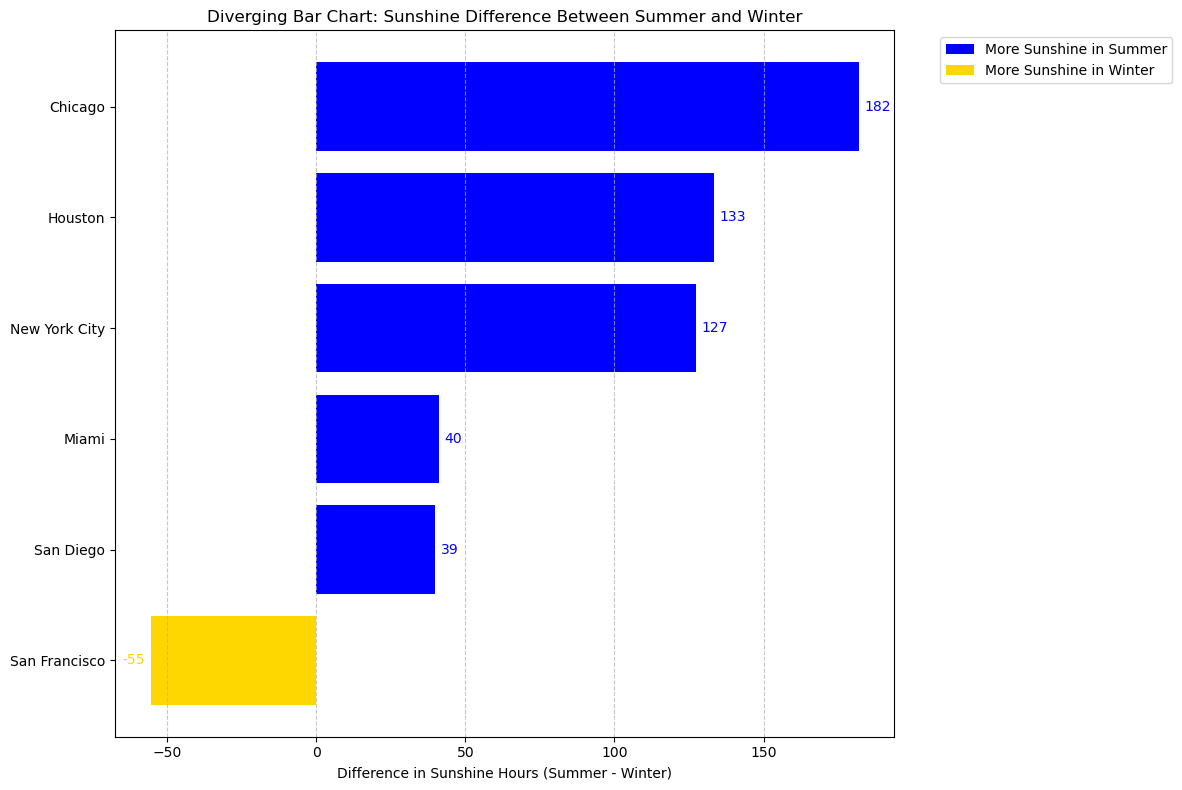

In [263]:
# Create a diverging bar chart with bars facing two sides
fig, ax = plt.subplots(figsize=(12, 8))

# Separate the data into positive and negative differences for visualizing both directions
pivot_data_filtered['Difference'] = pivot_data_filtered['Summer'] - pivot_data_filtered['Winter']

# Plot the positive and negative differences as diverging bars
bars_positive = ax.barh(pivot_data_filtered.index, pivot_data_filtered['Difference'].apply(lambda x: x if x > 0 else 0), 
                        color='blue', label='More Sunshine in Summer')
bars_negative = ax.barh(pivot_data_filtered.index, pivot_data_filtered['Difference'].apply(lambda x: x if x < 0 else 0), 
                        color='gold', label='More Sunshine in Winter')

# Add value labels for positive bars
for bar in bars_positive:
    if bar.get_width() > 0:  # Ensure the bar is positive
        ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_width())}', ha='left', va='center', fontsize=10, color='blue')

# Add value labels for negative bars
for bar in bars_negative:
    if bar.get_width() < 0:  # Ensure the bar is negative
        ax.text(bar.get_width() - 2, bar.get_y() + bar.get_height() / 2, 
                f'{int(bar.get_width())}', ha='right', va='center', fontsize=10, color='gold')

# Set labels and title
ax.set_xlabel('Difference in Sunshine Hours (Summer - Winter)')
ax.set_title('Diverging Bar Chart: Sunshine Difference Between Summer and Winter')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add grid lines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

In [264]:
# Using divergent chart to demonstrate the Sunshine hours in summer and winter

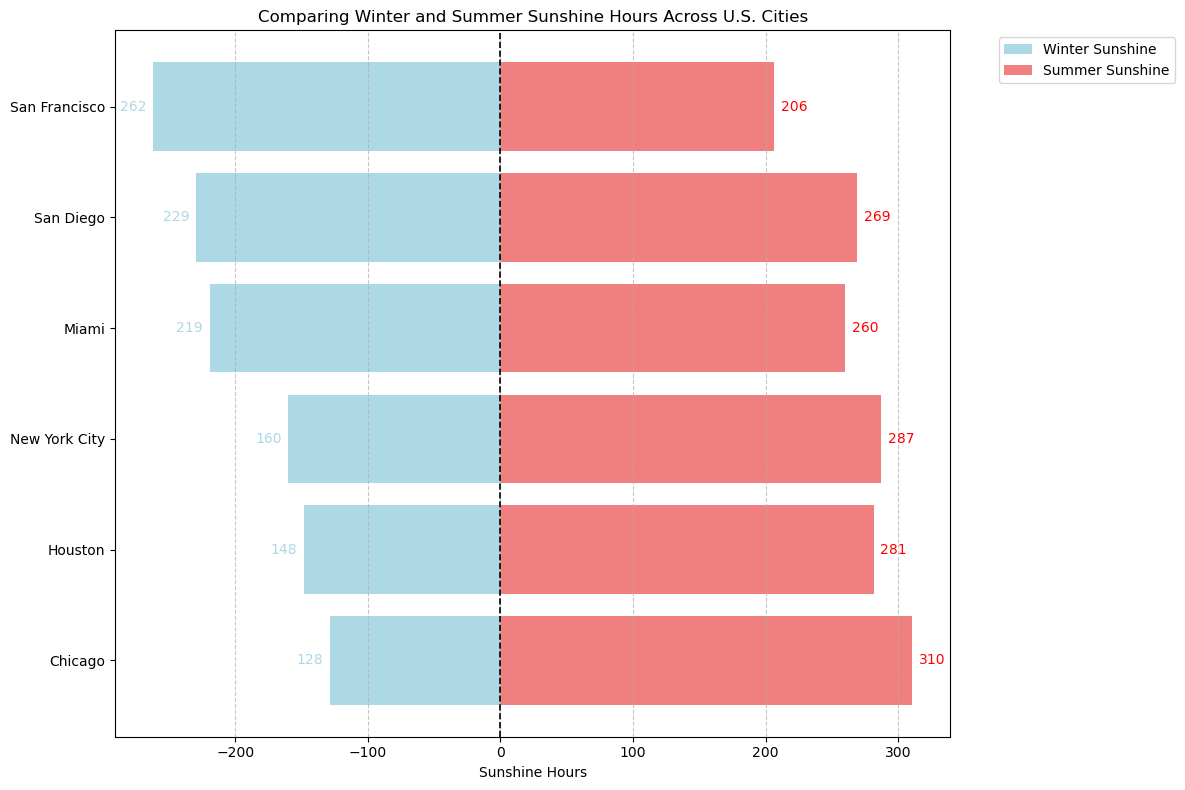

In [286]:
# Reverse the order of the bar chart from top to bottom

fig, ax = plt.subplots(figsize=(12, 8))

# Reverse the index order for plotting
pivot_data_filtered_reversed = pivot_data_filtered[::-1]

# Plot Winter sunshine on the left side (negative direction)
bars_winter = ax.barh(pivot_data_filtered_reversed.index, -pivot_data_filtered_reversed['Winter'], color='lightblue', label='Winter Sunshine')

# Plot Summer sunshine on the right side (positive direction)
bars_summer = ax.barh(pivot_data_filtered_reversed.index, pivot_data_filtered_reversed['Summer'], color='lightcoral', label='Summer Sunshine')

# Add value labels for Winter bars
for bar in bars_winter:
    ax.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, 
            f'{int(-bar.get_width())}', ha='right', va='center', fontsize=10, color='lightblue')

# Add value labels for Summer bars
for bar in bars_summer:
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_width())}', ha='left', va='center', fontsize=10, color='red')

# Set labels and title
ax.set_xlabel('Sunshine Hours')
ax.set_title('Comparing Winter and Summer Sunshine Hours Across U.S. Cities')

# Add vertical line at zero for separation
ax.axvline(0, color='black', linewidth=1.2, linestyle='--')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add grid lines for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibD

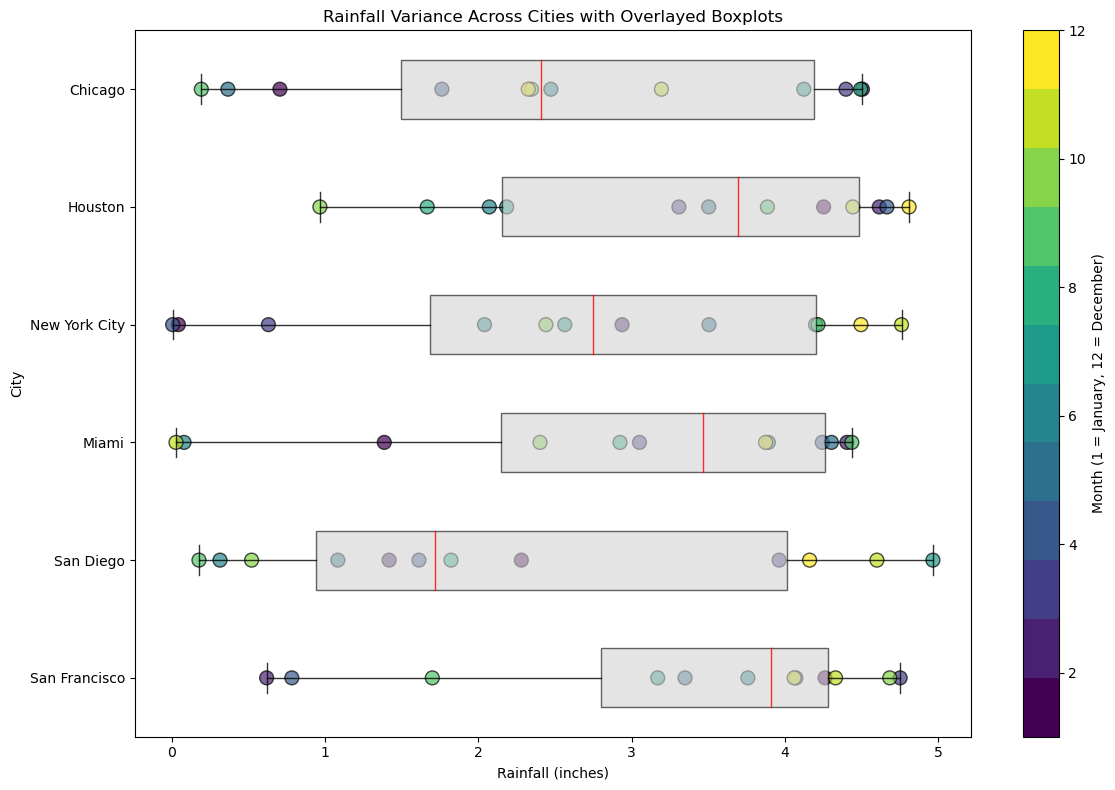

In [266]:
import matplotlib.cm as cm
colors = cm.get_cmap('viridis', 12)

import numpy as np
import pandas as pd

cities = ['San Francisco', 'San Diego', 'Miami', 'New York City', 'Houston', 'Chicago']
months = list(range(1, 13))  # Months from January (1) to December (12)

rainfall_data = {
    'city': np.repeat(cities, len(months)),
    'month': months * len(cities),
    'rainfall': np.random.rand(len(cities) * len(months)) * 5  # Random rainfall data in inches
}

rainfall_df = pd.DataFrame(rainfall_data)

# Create a combined overlay of scatter plot and boxplots
fig, ax = plt.subplots(figsize=(12, 8))

# Normalize month numbers for color mapping
norm = plt.Normalize(1, 12)
colors = cm.get_cmap('viridis', 12)

# Plot scatter points for rainfall by month for each city
for city in cities:
    city_data = rainfall_df[rainfall_df['city'] == city]
    ax.scatter(city_data['rainfall'], 
               np.repeat(city, len(city_data)), 
               c=city_data['month'], 
               cmap=colors, 
               norm=norm, 
               edgecolor='black', 
               s=100, 
               alpha=0.7)

# Add boxplots overlaid on the same axis
boxplot_data = [rainfall_df[rainfall_df['city'] == city]['rainfall'] for city in cities]
ax.boxplot(boxplot_data,
           vert=False,
           positions=range(len(cities)),
           patch_artist=True,
           boxprops=dict(facecolor='lightgray', color='black', alpha=0.6),
           whiskerprops=dict(color='black', alpha=0.8),
           capprops=dict(color='black', alpha=0.8),
           medianprops=dict(color='red', alpha=0.8))

# Set y-axis labels to city names
ax.set_yticks(range(len(cities)))
ax.set_yticklabels(cities)

# Add colorbar for scatter plot
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colors), ax=ax, orientation='vertical')
cbar.set_label('Month (1 = January, 12 = December)')

# Set labels and title
ax.set_xlabel('Rainfall (inches)')
ax.set_ylabel('City')
ax.set_title('Rainfall Variance Across Cities with Overlayed Boxplots')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/4057974991.py:39: MatplotlibD

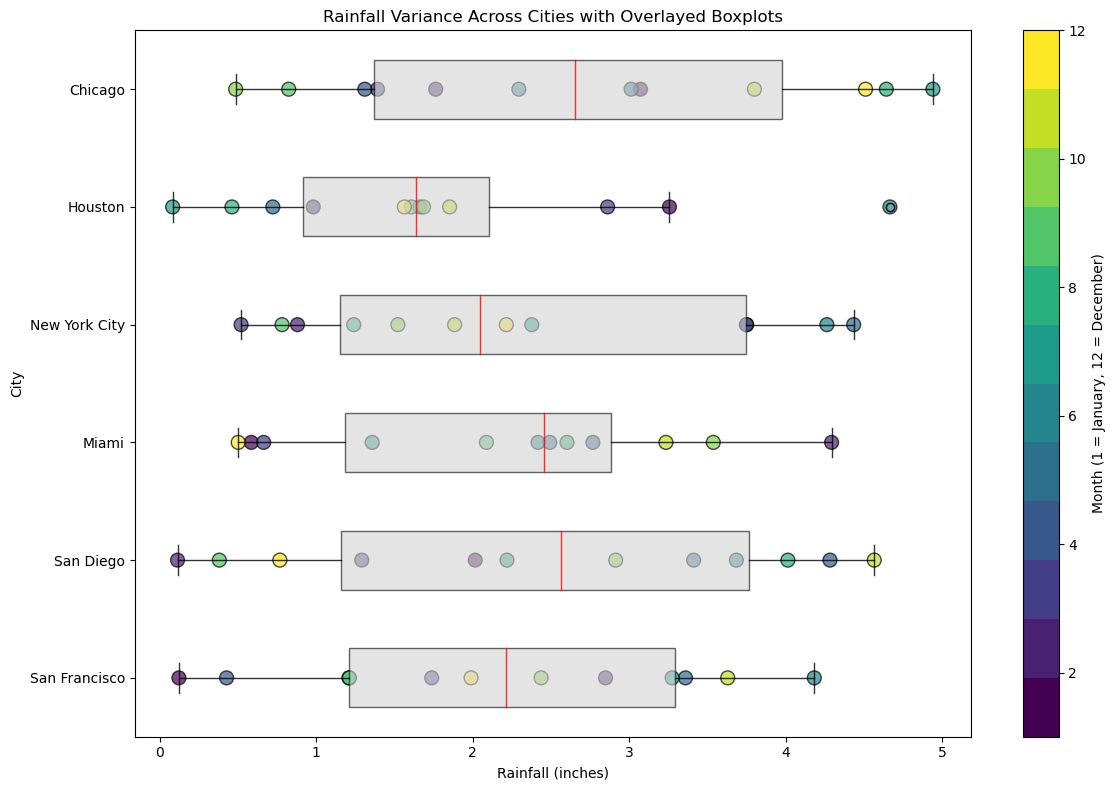

In [267]:
import matplotlib.cm as cm
colors = cm.get_cmap('viridis', 12)

import numpy as np
import pandas as pd

cities = ['San Francisco', 'San Diego', 'Miami', 'New York City', 'Houston', 'Chicago']
months = list(range(1, 13))  # Months from January (1) to December (12)

rainfall_data = {
    'city': np.repeat(cities, len(months)),
    'month': months * len(cities),
    'rainfall': np.random.rand(len(cities) * len(months)) * 5  # Random rainfall data in inches
}

rainfall_df = pd.DataFrame(rainfall_data)

# Create a combined overlay of scatter plot and boxplots
fig, ax = plt.subplots(figsize=(12, 8))

# Normalize month numbers for color mapping
norm = plt.Normalize(1, 12)
colors = cm.get_cmap('viridis', 12)

# Plot scatter points for rainfall by month for each city
for city in cities:
    city_data = rainfall_df[rainfall_df['city'] == city]
    ax.scatter(city_data['rainfall'], 
               np.repeat(city, len(city_data)), 
               c=city_data['month'], 
               cmap=colors, 
               norm=norm, 
               edgecolor='black', 
               s=100, 
               alpha=0.7)

# Add boxplots overlaid on the same axis
boxplot_data = [rainfall_df[rainfall_df['city'] == city]['rainfall'] for city in cities]
ax.boxplot(boxplot_data,
           vert=False,
           positions=range(len(cities)),
           patch_artist=True,
           boxprops=dict(facecolor='lightgray', color='black', alpha=0.6),
           whiskerprops=dict(color='black', alpha=0.8),
           capprops=dict(color='black', alpha=0.8),
           medianprops=dict(color='red', alpha=0.8))

# Set y-axis labels to city names
ax.set_yticks(range(len(cities)))
ax.set_yticklabels(cities)

# Add colorbar for scatter plot
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colors), ax=ax, orientation='vertical')
cbar.set_label('Month (1 = January, 12 = December)')

# Set labels and title
ax.set_xlabel('Rainfall (inches)')
ax.set_ylabel('City')
ax.set_title('Rainfall Variance Across Cities with Overlayed Boxplots')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [268]:
rainfall_df

,city,month,rainfall
0,San Francisco,1,0.122941
1,San Francisco,2,2.849013
2,San Francisco,3,1.738406
3,San Francisco,4,0.427606
4,San Francisco,5,3.359998
...,...,...,...
67,Chicago,8,4.643566
68,Chicago,9,0.824587
69,Chicago,10,0.485720
70,Chicago,11,3.800158


In [269]:
# import matplotlib.cm as cm
# colors = cm.get_cmap('viridis', 12)

# import numpy as np
# import pandas as pd




# rainfall_df = pd.DataFrame(rainfall_data)
# rainfall_df = data.copy()
# rainfall_df['rainfall'] = rainfall_df['rain']
# rainfall_df['month'] = rainfall_df['monthnum']  # Ensure 'month' column is numeric

# # Create a combined overlay of scatter plot and boxplots
# fig, ax = plt.subplots(figsize=(12, 8))

# # Normalize month numbers for color mapping
# norm = plt.Normalize(1, 12)
# colors = cm.get_cmap('viridis', 12)

# # Plot scatter points for rainfall by month for each city
# for city in cities:
#     ax.scatter(city_data['rainfall'], 
#                np.repeat(city, len(city_data)), 
#                c=city_data['monthnum'],  # Use 'monthnum' for color mapping
#                cmap=colors, 
#                norm=norm, 
#                edgecolor='black', 
#                s=100, 
#                alpha=0.7)

# # Add boxplots overlaid on the same axis
# boxplot_data = [rainfall_df[rainfall_df['city'] == city]['rainfall'] for city in cities]
# ax.boxplot(boxplot_data,
#            vert=False,
#            positions=range(len(cities)),
#            patch_artist=True,
#            boxprops=dict(facecolor='lightgray', color='black', alpha=0.6),
#            whiskerprops=dict(color='black', alpha=0.8),
#            capprops=dict(color='black', alpha=0.8),
#            medianprops=dict(color='red', alpha=0.8))

# # Set y-axis labels to city names
# ax.set_yticks(range(len(cities)))
# ax.set_yticklabels(cities)

# # Add colorbar for scatter plot
# cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colors), ax=ax, orientation='vertical')
# cbar.set_label('Month (1 = January, 12 = December)')

# # Set labels and title
# ax.set_xlabel('Rainfall (inches)')
# ax.set_ylabel('City')
# ax.set_title('Rainfall Variance Across Cities with Overlayed Boxplots')

# # Adjust layout
# plt.tight_layout()

# # Display the plot
# plt.show()
# # Create a combined overlay of scatter plot and boxplots for sunshine
# fig, ax = plt.subplots(figsize=(12, 8))

# # Plot scatter points for sunshine by month for each city
# for city in cities:
#     city_data = rainfall_df[rainfall_df['city'] == city]
#     ax.scatter(city_data['sunshine'], 
#                np.repeat(city, len(city_data)), 
#                c=city_data['monthnum'],  # Use 'monthnum' for color mapping
#                cmap=colors, 
#                norm=norm, 
#                edgecolor='black', 
#                s=100, 
#                alpha=0.7)

# # Add boxplots overlaid on the same axis
# boxplot_data = [rainfall_df[rainfall_df['city'] == city]['sunshine'] for city in cities]
# ax.boxplot(boxplot_data,
#            vert=False,
#            positions=range(len(cities)),
#            patch_artist=True,
#            boxprops=dict(facecolor='lightgray', color='black', alpha=0.6),
#            whiskerprops=dict(color='black', alpha=0.8),
#            capprops=dict(color='black', alpha=0.8),
#            medianprops=dict(color='red', alpha=0.8))

# # Set y-axis labels to city names
# ax.set_yticks(range(len(cities)))
# ax.set_yticklabels(cities)

# # Add colorbar for scatter plot
# cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colors), ax=ax, orientation='vertical')
# cbar.set_label('Month (1 = January, 12 = December)')

# # Set labels and title
# ax.set_xlabel('Sunshine (hours)')
# ax.set_ylabel('City')
# ax.set_title('Sunshine Variance Across Cities with Overlayed Boxplots')

# # Adjust layout
# plt.tight_layout()

# # Display the plot
# plt.show()

In [270]:
cities

['San Francisco', 'San Diego', 'Miami', 'New York City', 'Houston', 'Chicago']

/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:30: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:30: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:30: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:30: MatplotlibD

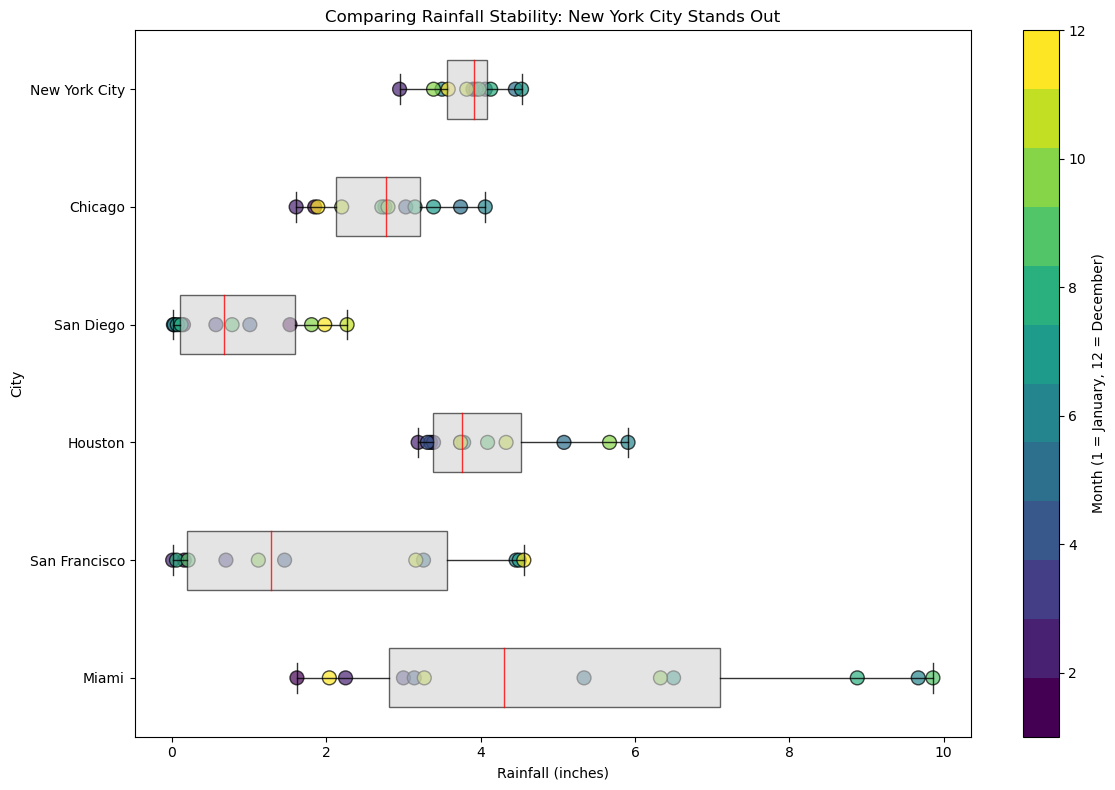

/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:74: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:74: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:74: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.boxplot(boxplot_data,
/var/folders/0y/gbwmzjp93k12t06yhk8_2p7h0000gn/T/ipykernel_52780/2224268536.py:74: MatplotlibD

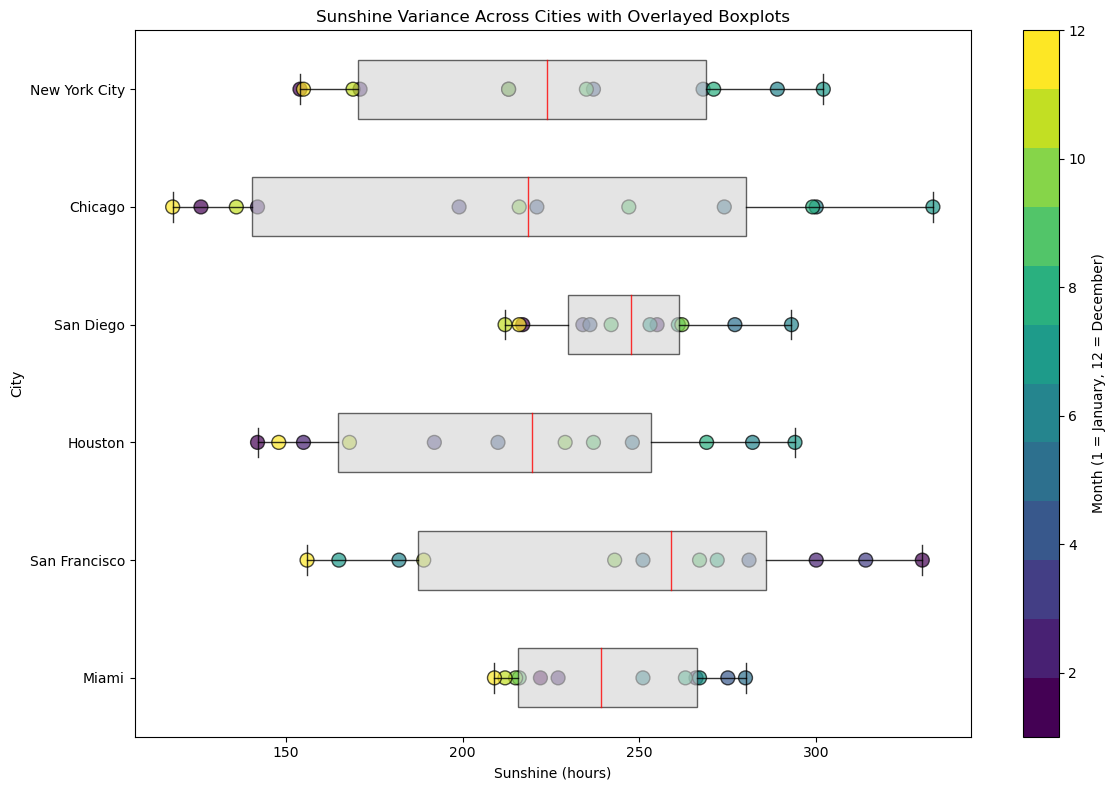

In [280]:
import matplotlib.cm as cm
colors = cm.get_cmap('viridis', 12)

rainfall_df = pd.DataFrame(rainfall_data)
rainfall_df = data.copy()
rainfall_df['rainfall'] = rainfall_df['rain']
rainfall_df['month'] = rainfall_df['monthnum']  # Ensure 'month' column is numeric

# Create a combined overlay of scatter plot and boxplots
fig, ax = plt.subplots(figsize=(12, 8))

# Normalize month numbers for color mapping
norm = plt.Normalize(1, 12)
colors = cm.get_cmap('viridis', 12)
cities = ['New York City', 'Chicago', 'San Diego', 'Houston', 'San Francisco', 'Miami'][::-1]
# Plot scatter points for rainfall by month for each city
for city in cities:
    city_data = rainfall_df[rainfall_df['city'] == city]
    ax.scatter(city_data['rainfall'], 
               np.repeat(city, len(city_data)), 
               c=city_data['monthnum'],  # Use 'monthnum' for color mapping
               cmap=colors, 
               norm=norm, 
               edgecolor='black', 
               s=100, 
               alpha=0.7);

# Add boxplots overlaid on the same axis
boxplot_data = [rainfall_df[rainfall_df['city'] == city]['rainfall'] for city in cities]
ax.boxplot(boxplot_data,
           vert=False,
           positions=range(len(cities)),
           patch_artist=True,
           boxprops=dict(facecolor='lightgray', color='black', alpha=0.6),
           whiskerprops=dict(color='black', alpha=0.8),
           capprops=dict(color='black', alpha=0.8),
           medianprops=dict(color='red', alpha=0.8));

# Set y-axis labels to city names
ax.set_yticks(range(len(cities)))
ax.set_yticklabels(cities)

# Add colorbar for scatter plot
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colors), ax=ax, orientation='vertical')
cbar.set_label('Month (1 = January, 12 = December)')

# Set labels and title
ax.set_xlabel('Rainfall (inches)')
ax.set_ylabel('City')
ax.set_title('Comparing Rainfall Stability: New York City Stands Out')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
# Create a combined overlay of scatter plot and boxplots for sunshine
fig, ax = plt.subplots(figsize=(12, 8))

# Plot scatter points for sunshine by month for each city
for city in cities:
    city_data = rainfall_df[rainfall_df['city'] == city]
    ax.scatter(city_data['sunshine'], 
               np.repeat(city, len(city_data)), 
               c=city_data['monthnum'],  # Use 'monthnum' for color mapping
               cmap=colors, 
               norm=norm, 
               edgecolor='black', 
               s=100, 
               alpha=0.7);

# Add boxplots overlaid on the same axis
boxplot_data = [rainfall_df[rainfall_df['city'] == city]['sunshine'] for city in cities]
ax.boxplot(boxplot_data,
           vert=False,
           positions=range(len(cities)),
           patch_artist=True,
           boxprops=dict(facecolor='lightgray', color='black', alpha=0.6),
           whiskerprops=dict(color='black', alpha=0.8),
           capprops=dict(color='black', alpha=0.8),
           medianprops=dict(color='red', alpha=0.8));

# Set y-axis labels to city names
ax.set_yticks(range(len(cities)))
ax.set_yticklabels(cities)

# Add colorbar for scatter plot
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colors), ax=ax, orientation='vertical')
cbar.set_label('Month (1 = January, 12 = December)')

# Set labels and title
ax.set_xlabel('Sunshine (hours)')
ax.set_ylabel('City')
ax.set_title('Sunshine Variance Across Cities with Overlayed Boxplots')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [272]:
# 什么最适合玩

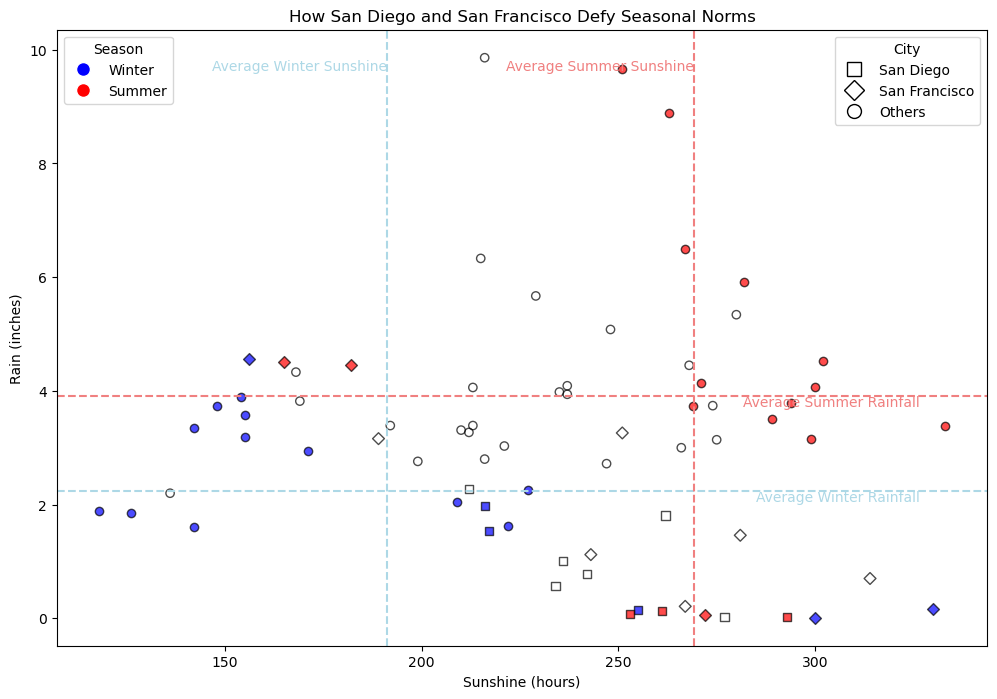

In [289]:
# Assign different shapes to each city
shapes = {'San Diego': 's', 'San Francisco': 'D'}

# Create a scatter plot with different shapes for each city
fig, ax1 = plt.subplots(figsize=(12, 8))

for i, city in enumerate(cities):
    city_data = data[data['city'] == city]
    for index, row in city_data.iterrows():
        if row['season'] == 'Winter':
            color = 'blue'
        elif row['season'] == 'Summer':
            color = 'red'
        elif row['season'] == 'Fall':
            color = 'none'
        else:
            color = 'none'
        
        marker = shapes.get(city, 'o')  # Use specific shape for San Diego and San Francisco, otherwise circle
        ax1.scatter(row['sunshine'], row['rain'], edgecolor='black', alpha=0.7, color=color, marker=marker)

ax1.set_xlabel('Sunshine (hours)')
ax1.set_ylabel('Rain (inches)')
ax1.set_title('How San Diego and San Francisco Defy Seasonal Norms')

# Calculate mean sunshine for summer and winter seasons
mean_sunshine_summer = data[data['season'] == 'Summer']['sunshine'].mean()
mean_sunshine_winter = data[data['season'] == 'Winter']['sunshine'].mean()
mean_rainfall_summer = data[data['season'] == 'Summer']['rain'].mean()
mean_rainfall_winter = data[data['season'] == 'Winter']['rain'].mean()

# Draw vertical lines for mean sunshine in summer and winter
ax1.axhline(y=mean_rainfall_summer, color='lightcoral', linestyle='--', label='Average Summer Rainfall')
ax1.axvline(x=mean_sunshine_winter, color='lightblue', linestyle='--', label='Average Winter Sunshine')
ax1.axhline(y=mean_rainfall_winter, color='lightblue', linestyle='--', label='Average Winter Rainfall')
ax1.axvline(x=mean_sunshine_summer, color='lightcoral', linestyle='--', label='Average Summer Sunshine')

# Add text annotations for the lines
ax1.text(mean_sunshine_summer, ax1.get_ylim()[1] * 0.95, 'Average Summer Sunshine', color='lightcoral', ha='right', va='top')
ax1.text(mean_sunshine_winter, ax1.get_ylim()[1] * 0.95, 'Average Winter Sunshine', color='lightblue', ha='right', va='top')
ax1.text(ax1.get_xlim()[1] * 0.95, mean_rainfall_summer, 'Average Summer Rainfall', color='lightcoral', ha='right', va='top')
ax1.text(ax1.get_xlim()[1] * 0.95, mean_rainfall_winter, 'Average Winter Rainfall', color='lightblue', ha='right', va='top')

# Add legend for shapes
handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='none', markeredgecolor='k', markersize=10, label='San Diego'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='none', markeredgecolor='k', markersize=10, label='San Francisco'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='none', markeredgecolor='k', markersize=10, label='Others')
]
shape_legend = ax1.legend(handles=handles, title='City', loc='upper right')

# Add legend for seasons
season_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Winter'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Summer')
]
season_legend = ax1.legend(handles=season_handles, title='Season', loc='upper left')

# Add the shape legend back to the plot
ax1.add_artist(shape_legend)

# Display the plot
plt.grid(False)
plt.show()


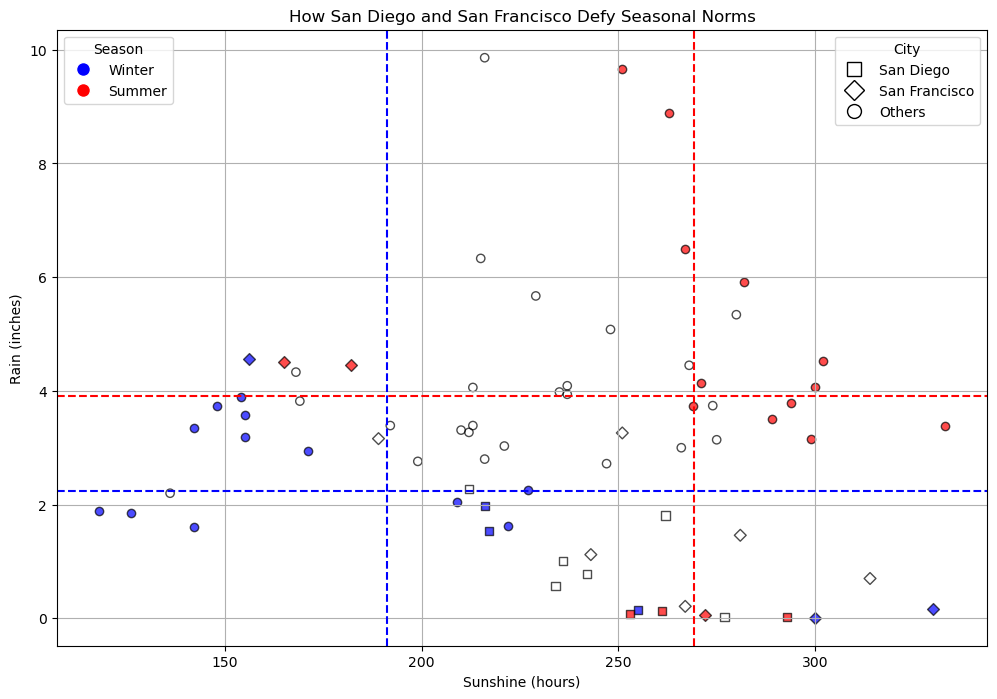

In [287]:
# Assign different shapes to each city
shapes = {'San Diego': 's', 'San Francisco': 'D'}

# Create a scatter plot with different shapes for each city
fig, ax1 = plt.subplots(figsize=(12, 8))

for i, city in enumerate(cities):
    city_data = data[data['city'] == city]
    for index, row in city_data.iterrows():
        if row['season'] == 'Winter':
            color = 'blue'
        elif row['season'] == 'Summer':
            color = 'red'
        elif row['season'] == 'Fall':
            color = 'none'
        else:
            color = 'none'
        
        marker = shapes.get(city, 'o')  # Use specific shape for San Diego and San Francisco, otherwise circle
        ax1.scatter(row['sunshine'], row['rain'], edgecolor='black', alpha=0.7, color=color, marker=marker)

ax1.set_xlabel('Sunshine (hours)')
ax1.set_ylabel('Rain (inches)')
ax1.set_title('How San Diego and San Francisco Defy Seasonal Norms')

# Calculate mean sunshine for summer and winter seasons
mean_sunshine_summer = data[data['season'] == 'Summer']['sunshine'].mean()
mean_sunshine_winter = data[data['season'] == 'Winter']['sunshine'].mean()
mean_rainfall_summer = data[data['season'] == 'Summer']['rain'].mean()
mean_rainfall_winter = data[data['season'] == 'Winter']['rain'].mean()

# Draw vertical lines for mean sunshine in summer and winter
ax1.axvline(x=mean_sunshine_summer, color='red', linestyle='--', label='Average Summer Sunshine')
ax1.axhline(y=mean_rainfall_summer, color='red', linestyle='--', label='Average Summer Rainfall')
ax1.axvline(x=mean_sunshine_winter, color='blue', linestyle='--', label='Average Winter Sunshine')
ax1.axhline(y=mean_rainfall_winter, color='blue', linestyle='--', label='Average Winter Rainfall')

# Add legend for shapes
handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='none', markeredgecolor='k', markersize=10, label='San Diego'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='none', markeredgecolor='k', markersize=10, label='San Francisco'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='none', markeredgecolor='k', markersize=10, label='Others')
]
shape_legend = ax1.legend(handles=handles, title='City', loc='upper right')

# Add legend for seasons
season_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Winter'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Summer')
]
season_legend = ax1.legend(handles=season_handles, title='Season', loc='upper left')

# Add the shape legend back to the plot
ax1.add_artist(shape_legend)

# Display the plot
plt.grid(True)
plt.show()
